## DBSCAN
### DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.



***Core*** — This is a point that has at least m points within distance n from itself.<br>
***Border*** — This is a point that has at least one Core point at a distance n.<br>
***Noise*** — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself. <br>

Algorithmic steps for DBSCAN clustering

1] The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).
<br>
2] If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.
<br>
3] The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point 


### Steps of DBSCAN Algorithm:

With the definitions above, we can go through the steps of DBSCAN algorithm as below —

    1] The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the ϵ parameter.
    2] If this point contains MinPts within ϵ neighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster. Concept of density reachable and density connected points are important here.
    3] If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.
    4] The above process continues until the density-connected cluster is completely found.
    5] The process restarts with a new point which can be a part of a new cluster or labeled as noise.
    
### Parameter Estimation

 
Every data mining task has the problem of parameters. Every parameter influences the algorithm in specific ways. For DBSCAN, the parameters ε and minPts are needed.

***minPts:*** As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as minPts ≥ D + 1. The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, minPts = 2·dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.<br><br>
***ε***: The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.<br><br>
***Distance function***: The choice of distance function is tightly linked to the choice of ε, and has a major impact on the outcomes. In general, it will be necessary to first identify a reasonable measure of similarity for the data set, before the parameter ε can be chosen. There is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set. 

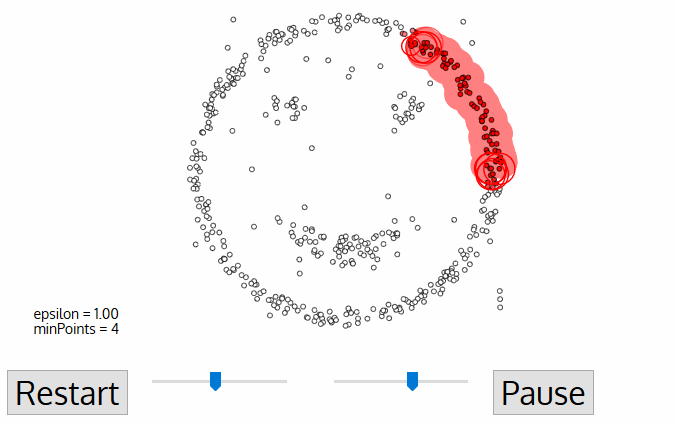

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../Data/Mall_Customers.csv")

In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [4]:
df=df[['Annual_Income_(k$)', 'Spending_Score']]

In [5]:
df.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#min points Dim+1 => 2+1=3

In [8]:
# k- distance plot
from sklearn.neighbors import NearestNeighbors
n=NearestNeighbors(n_neighbors=2)
n_fit=n.fit(df)
distance,_=n_fit.kneighbors(df)
distance=np.sort(distance,axis=0)
#print(distance)
distance=distance[:,1]
print(distance)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.41421356  1.41421356  1.41421356
  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356
  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356
  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356
  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          

Text(0, 0.5, 'Epsilon')

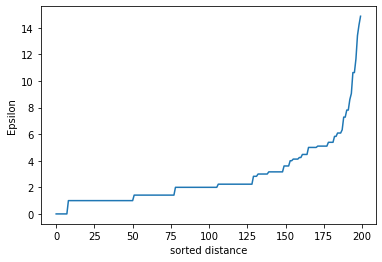

In [9]:
plt.plot(distance)
plt.xlabel("sorted distance")
plt.ylabel("Epsilon")

In [ ]:
#epsilon =5

In [24]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=5,min_samples=3)
model.fit(df)

DBSCAN(eps=5, min_samples=3)

In [25]:
model.labels_

array([-1,  1,  0,  1, -1,  1,  0, -1,  0,  1,  2, -1,  2,  1,  2,  1,  3,
       -1, -1, -1,  3,  4, -1,  4,  5, -1,  3, -1,  3, -1, -1,  4, -1, -1,
        5, -1,  5,  4, -1,  4, -1, -1, -1,  6, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7, -1,  8, -1,  7,  9,  8,  9,  8, -1,  8,  9,  7,
        9,  8,  9,  8,  9,  7, 10,  7,  9,  7, 10,  8,  9,  7,  9,  7,  9,
        8,  9,  7,  9,  8,  9,  8, 10,  7,  9,  7, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [26]:
df.columns 

Index(['Annual_Income_(k$)', 'Spending_Score'], dtype='object')

Text(0.5, 1.0, 'Annual_Income_(k$) vs Spending_Score')

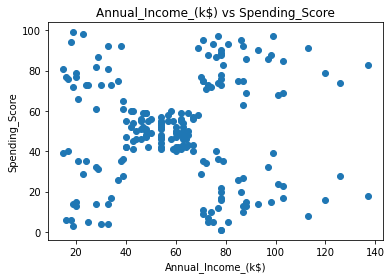

In [32]:
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'])
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Annual_Income_(k$) vs Spending_Score")

Text(0, 0.5, 'Spending_Score')

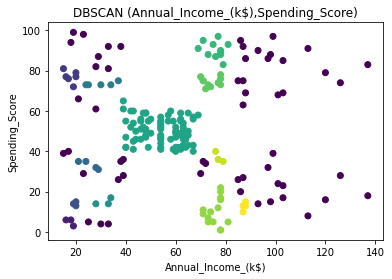

In [34]:
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'],c=model.labels_)
plt.title("DBSCAN (Annual_Income_(k$),Spending_Score)")
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")